# Análisis del mercado crypto

In [53]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import requests
from datetime import datetime

from matplotlib.pyplot import figure


## Extracción y manipilación de datos

Se tendrán en cuenta los precios de cierre en intervalos horarios de los ultimos 83 días para las principales criptomonedas: Bitcoin, Ethereum, Cardano, Polkadot, Solana, Chainlink y UniSwap 

In [10]:
for i in ['BTC','ETH','ADA','DOT','SOL','LINK','UNI']:
    from_symbol = i
    to_symbol = 'USDT'
    exchange = 'Binance'
    datetime_interval = 'hour'
    
    def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
        return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)


    def download_data(from_symbol, to_symbol, exchange, datetime_interval):
        supported_intervals = {'minute', 'hour', 'day'}
        assert datetime_interval in supported_intervals,           'datetime_interval should be one of %s' % supported_intervals

        print('Downloading %s trading data for %s %s from %s' %
              (datetime_interval, from_symbol, to_symbol, exchange))
        base_url = 'https://min-api.cryptocompare.com/data/histo'
        url = '%s%s' % (base_url, datetime_interval)

        params = {'fsym': from_symbol, 'tsym': to_symbol,
                  'limit': 2000, 'aggregate': 1,
                  'e': exchange}
        request = requests.get(url, params=params)
        data = request.json()
        return data


    def convert_to_dataframe(data):
        df = pd.io.json.json_normalize(data, ['Data'])
        df['datetime'] = pd.to_datetime(df.time, unit='s')
        df = df[['datetime', 'low', 'high', 'open',
                 'close', 'volumefrom', 'volumeto']]
        return df


    def filter_empty_datapoints(df):
        indices = df[df.sum(axis=1) == 0].index
        print('Filtering %d empty datapoints' % indices.shape[0])
        df = df.drop(indices)
        return df


    data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
    df = convert_to_dataframe(data)
    df = filter_empty_datapoints(df)

    current_datetime = datetime.now().date().isoformat()
    filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
    print('Saving data to %s' % filename)
    df.to_csv(filename, index=False)

def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change type from object to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

Filtering 0 empty datapoints
Saving data to BTC_USDT_Binance_hour_2022-05-12.csv
Filtering 0 empty datapoints
Saving data to ETH_USDT_Binance_hour_2022-05-12.csv
Filtering 0 empty datapoints
Saving data to ADA_USDT_Binance_hour_2022-05-12.csv
Filtering 0 empty datapoints
Saving data to DOT_USDT_Binance_hour_2022-05-12.csv
Filtering 0 empty datapoints
Saving data to SOL_USDT_Binance_hour_2022-05-12.csv
Filtering 0 empty datapoints
Saving data to LINK_USDT_Binance_hour_2022-05-12.csv
Filtering 0 empty datapoints
Saving data to UNI_USDT_Binance_hour_2022-05-12.csv


In [11]:
df_btc = read_dataset(get_filename('BTC', 'USDT', 'Binance', 'hour', current_datetime))
df_eth = read_dataset(get_filename('ETH', 'USDT', 'Binance', 'hour', current_datetime))
df_ada= read_dataset(get_filename('ADA', 'USDT', 'Binance', 'hour', current_datetime))
df_dot = read_dataset(get_filename('DOT', 'USDT', 'Binance', 'hour', current_datetime))
df_sol = read_dataset(get_filename('SOL', 'USDT', 'Binance', 'hour', current_datetime))
df_link = read_dataset(get_filename('LINK', 'USDT', 'Binance', 'hour', current_datetime))
df_uni= read_dataset(get_filename('UNI', 'USDT', 'Binance', 'hour', current_datetime))

Reading data from BTC_USDT_Binance_hour_2022-05-12.csv
(2001, 6)
Reading data from ETH_USDT_Binance_hour_2022-05-12.csv
(2001, 6)
Reading data from ADA_USDT_Binance_hour_2022-05-12.csv
(2001, 6)
Reading data from DOT_USDT_Binance_hour_2022-05-12.csv
(2001, 6)
Reading data from SOL_USDT_Binance_hour_2022-05-12.csv
(2001, 6)
Reading data from LINK_USDT_Binance_hour_2022-05-12.csv
(2001, 6)
Reading data from UNI_USDT_Binance_hour_2022-05-12.csv
(2001, 6)


In [12]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'ADA': df_ada.close,
                   'DOT': df_dot.close,
                   'SOL': df_sol.close,
                   'LINK': df_link.close,
                   'UNI': df_uni.close,
                  })
df.head()

,BTC,ETH,ADA,DOT,SOL,LINK,UNI
datetime,,,,,,,
2022-02-18 05:00:00,40625.63,2898.94,1.032,18.34,94.50,15.85,10.42
2022-02-18 06:00:00,40712.19,2907.40,1.037,18.40,95.09,15.92,10.52
2022-02-18 07:00:00,40665.81,2905.25,1.034,18.40,95.18,15.87,10.50
2022-02-18 08:00:00,40868.39,2939.32,1.040,18.56,96.20,16.01,10.63
2022-02-18 09:00:00,40873.00,2930.15,1.037,18.53,95.70,15.96,10.66


## Análisis

Podemos evaluar precio máximo y minimo de cada moneda, incluyendo su varianza en este intervalo. 

In [13]:
df.describe()

,BTC,ETH,ADA,DOT,SOL,LINK,UNI
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,40477.765292,2896.824253,0.920725,18.020685,96.216347,13.974338,9.199175
std,3516.159142,294.383323,0.144419,2.656891,15.553693,2.097666,1.393744
min,27114.840000,1835.290000,0.413200,7.720000,40.690000,5.820000,4.090000
25%,38745.010000,2675.170000,0.818300,16.880000,86.880000,13.140000,8.500000
50%,40079.170000,2899.920000,0.897400,18.070000,93.980000,14.040000,9.250000
75%,42488.670000,3073.000000,0.983000,19.280000,102.760000,15.320000,10.010000
max,47970.990000,3544.480000,1.241000,23.700000,141.620000,18.160000,12.420000


Evaluación de aquellas monedas con más variacion porcentual. 

In [14]:
for i in ['BTC','ETH','ADA','DOT','SOL','LINK','UNI']:
    x=(df[i].std()/df[i].max())*100
    print(i, "price fluctuation (%) in the past 2.7 months:",x)

BTC price fluctuation (%) in the past 2.7 months: 7.329761470815344
ETH price fluctuation (%) in the past 2.7 months: 8.30540228569555
ADA price fluctuation (%) in the past 2.7 months: 11.637291260165243
DOT price fluctuation (%) in the past 2.7 months: 11.21051006822491
SOL price fluctuation (%) in the past 2.7 months: 10.982695262562919
LINK price fluctuation (%) in the past 2.7 months: 11.551025969861376
UNI price fluctuation (%) in the past 2.7 months: 11.221773740264522


## Profundizando caso a caso

Mediante el diagrama de caja evaluamos el rango cierre de precios más comun en los ultimos 2.7 meses por moneda, pudiendo evaluar aquellos outlayers por debajo, confirmando la tendencia bajista de los ultimos meses.
Mediante el histograma podemos ver cuales el precio que más se ha repetido por horas durante el periodo. 

**BITCOIN**

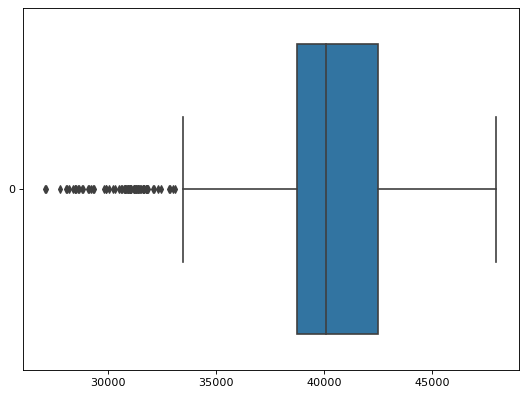

In [33]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['BTC'], orient="h", hue_order=i)

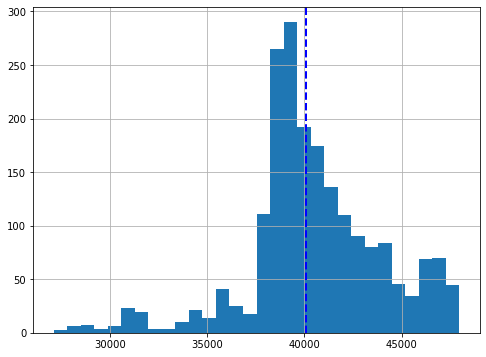

In [30]:
df['BTC'].hist(bins=30, figsize=(8,6)).axvline(df['BTC'].median(), color='b', linestyle='dashed', linewidth=2)

**ETHEREUM**

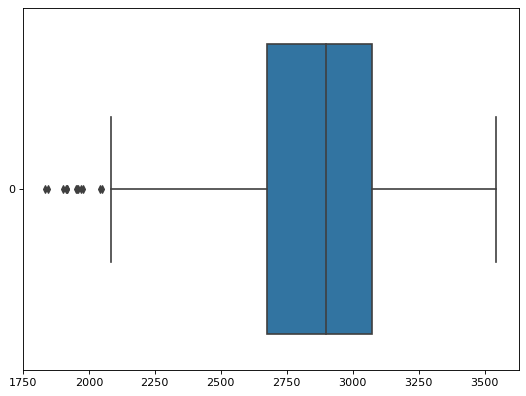

In [49]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['ETH'], orient="h", hue_order=i)

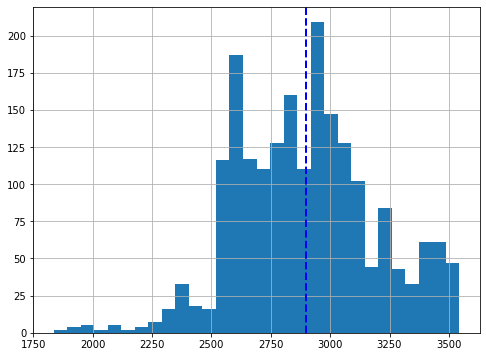

In [35]:
df['ETH'].hist(bins=30, figsize=(8,6)).axvline(df['ETH'].median(), color='b', linestyle='dashed', linewidth=2)

**CARDANO**

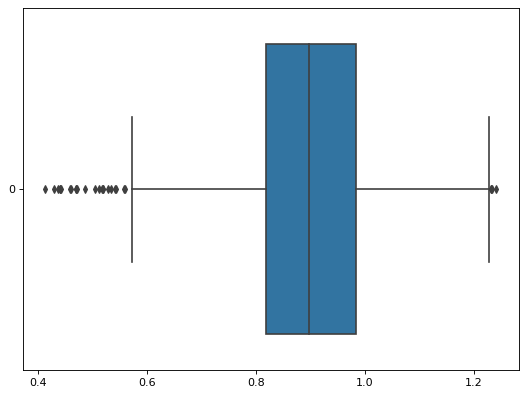

In [28]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['ADA'], orient="h", hue_order=i)

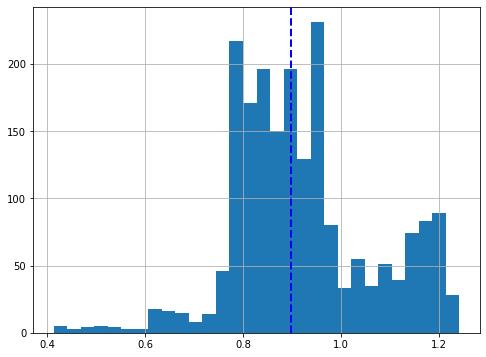

In [36]:
df['ADA'].hist(bins=30, figsize=(8,6)).axvline(df['ADA'].median(), color='b', linestyle='dashed', linewidth=2)

**POLKADOT**

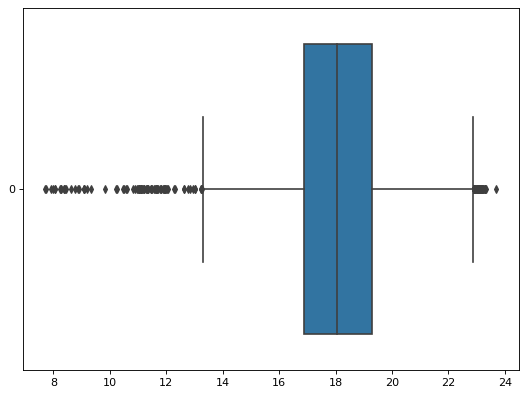

In [40]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['DOT'], orient="h", hue_order=i)

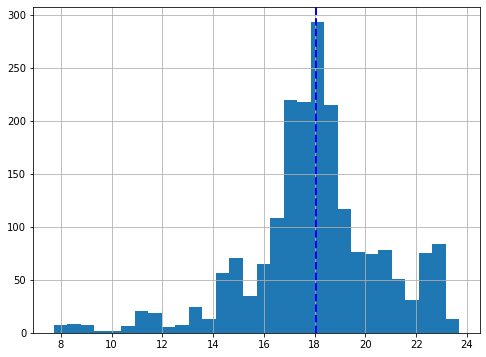

In [29]:
df['DOT'].hist(bins=30, figsize=(8,6)).axvline(df['DOT'].median(), color='b', linestyle='dashed', linewidth=2)

**SOLANA**

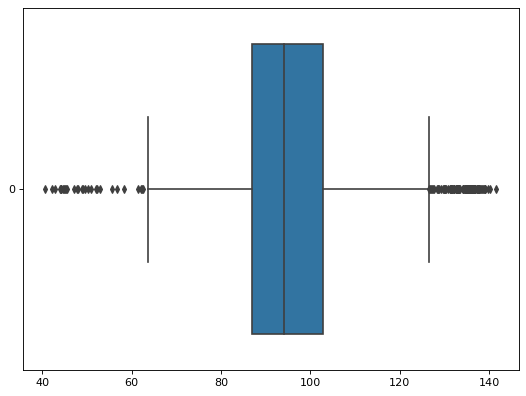

In [41]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['SOL'], orient="h", hue_order=i)

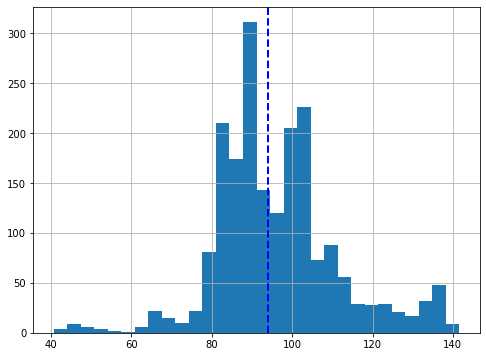

In [42]:
df['SOL'].hist(bins=30, figsize=(8,6)).axvline(df['SOL'].median(), color='b', linestyle='dashed', linewidth=2)

**CHAINLINK**

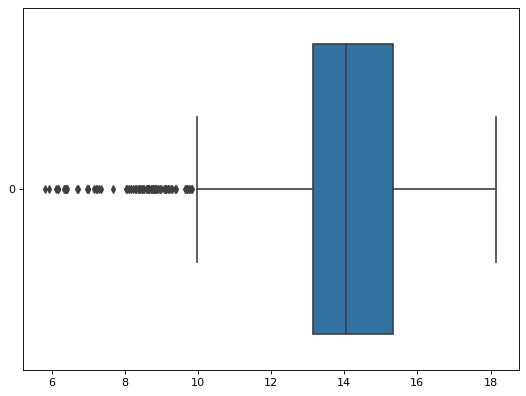

In [43]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['LINK'], orient="h", hue_order=i)

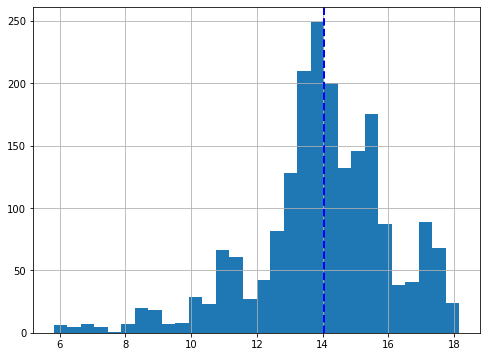

In [44]:
df['LINK'].hist(bins=30, figsize=(8,6)).axvline(df['LINK'].median(), color='b', linestyle='dashed', linewidth=2)

**UNISWAP**

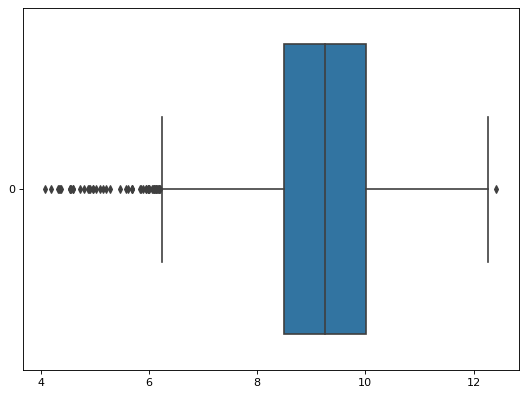

In [46]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(data=df['UNI'], orient="h", hue_order=i)

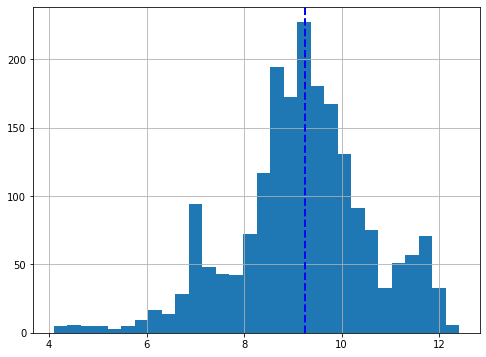

In [47]:
df['UNI'].hist(bins=30, figsize=(8,6)).axvline(df['UNI'].median(), color='b', linestyle='dashed', linewidth=2)

## Cambios relativos de precios

Buscamos identificar si existe alguna moneda que se comporte de forma contraria al mercado. Para ello,  
graficamos la evolución de precios de cada par y observamos que todas las monedas analizadas siguen la tendencia  
del mercado del mismo modo: cuando el precio de cierre de una moneda sube, la del resto seguirá el movimiento. 

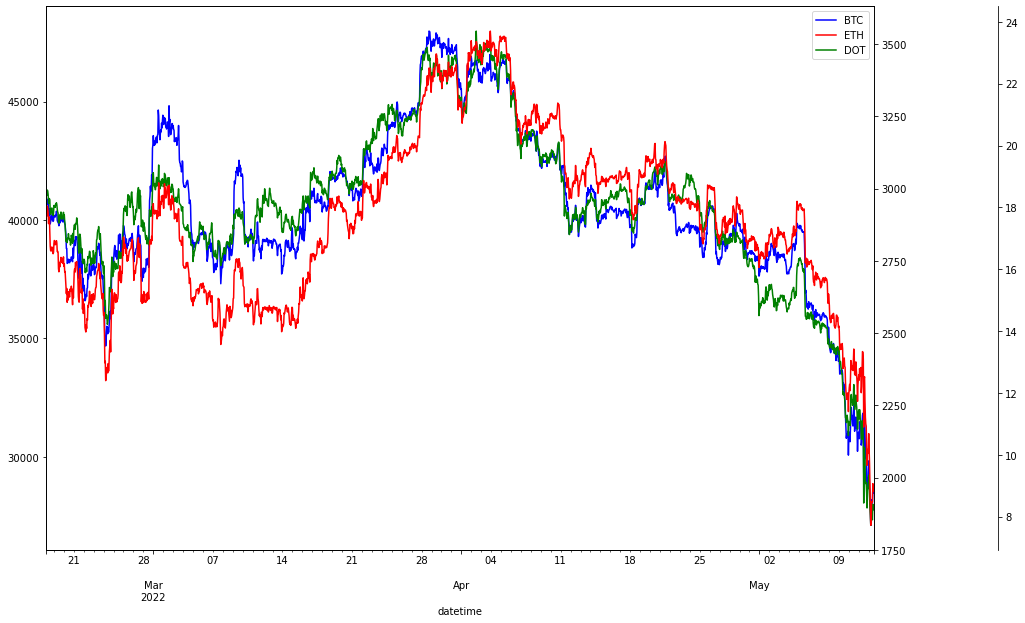

In [52]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['DOT'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'DOT'])


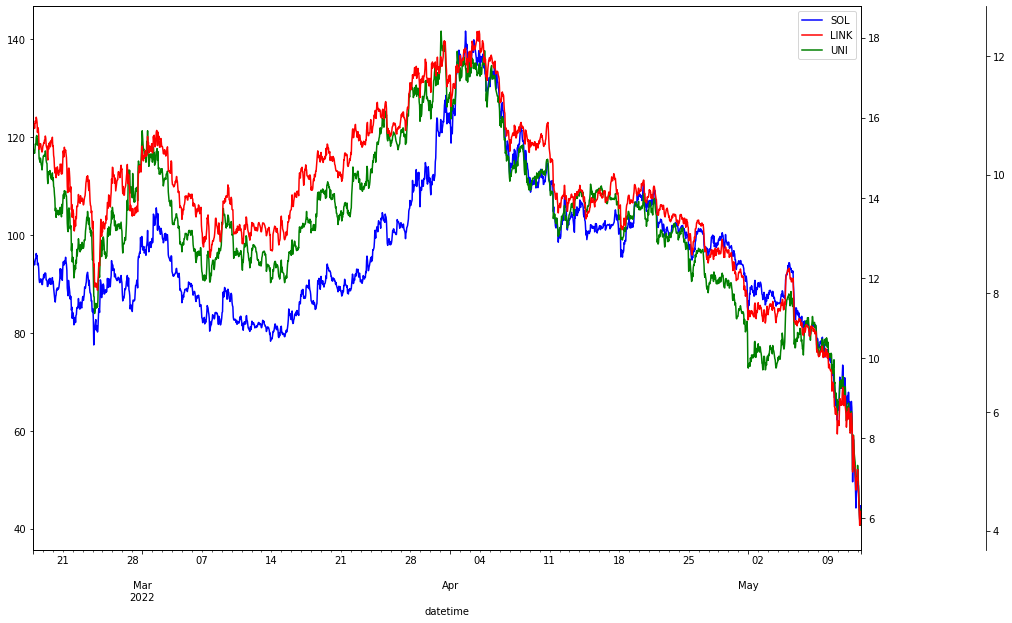

In [158]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['SOL'].plot(ax=ax1, style='b-')
df['LINK'].plot(ax=ax1, style='r-', secondary_y=True)
df['UNI'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['SOL', 'LINK', 'UNI'])



## Matriz de correlación (Pearson Correlation) entre precios de cierre para cada par

Normalizamos los precios para poder evaluar de forma correcta la matriz de correlación. 

In [159]:
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) 

<AxesSubplot:>

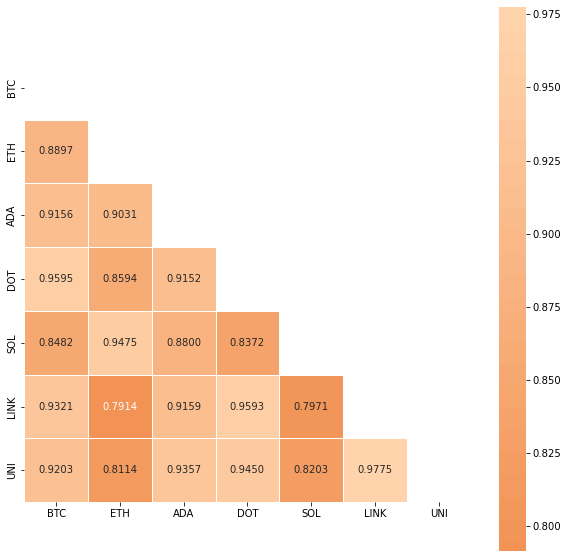

In [160]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

La mayor correlación con bitcoin es la de DOT (0.9595) y la menor con SOL (0.8482)

## Evaluación de estrategia buy & hold 

Evaluamos el rendimiento de la estrategia buy and hold durante los ultimos 2.7 meses para cada par.

In [120]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,ADA,DOT,SOL,LINK,UNI
datetime,,,,,,,
2022-02-17 02:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-02-17 03:00:00,0.990626,0.984454,0.992640,0.983257,0.977338,0.986728,0.979519
2022-02-17 04:00:00,0.991368,0.978436,0.984361,0.983765,0.980392,0.975188,0.973286
2022-02-17 05:00:00,0.991406,0.979687,0.984361,0.984779,0.980688,0.971725,0.976848
2022-02-17 06:00:00,0.996439,0.989280,0.992640,0.991882,0.990541,0.978073,0.989314


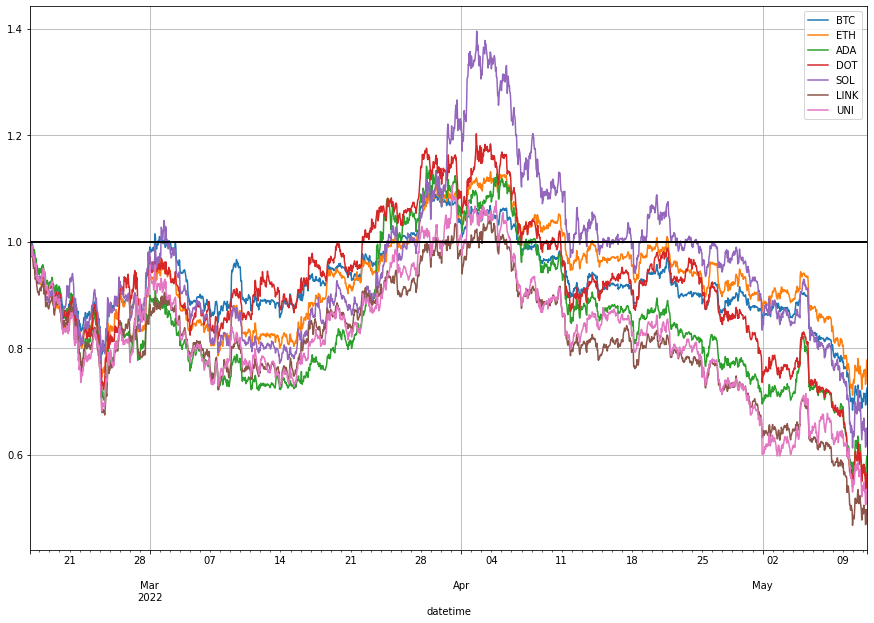

In [121]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

Todas las cripto habrían dado perdidas, de menor a mayor perdidas:   
    - ETH  
    - BTC  
    - SOL  
    - ADA  
    - DOT  
    - UNI  
    - LINK  